# Import files and libraries


In [341]:
!pip install pandas numpy scikit-learn matplotlib zip-files imblearn mlxtend

In [342]:
from zipfile import ZipFile
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import KMeansSMOTE

In [343]:
# sklearn imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# estimators
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.metrics import roc_curve , roc_auc_score  , auc

In [344]:
# python notebook and DS Test.zip must be at same root level


'''
Plese enter your zip file location here
'''

# file_name = "DS Test.zip"
# with ZipFile(file_name, "r") as zip:
#     zip.extractall(path="/content/")


'\nPlese enter your zip file location here\n'

# Data preprocessing

In [362]:
x_train = pd.read_csv("/DS Test/Training/X_train.csv")
y_train = pd.read_csv("/DS Test/Training/y_train.csv")



In [363]:
x_train[['C6','C8']] =  x_train[['C6','C8']].replace({True: 1, False: 0})


In [364]:
y_train.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


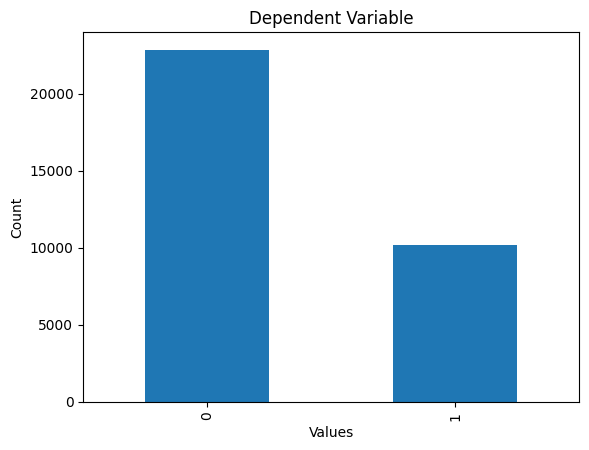

In [365]:
y_train['Dependent_Variable'].value_counts().plot.bar()
plt.title('Dependent Variable')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()


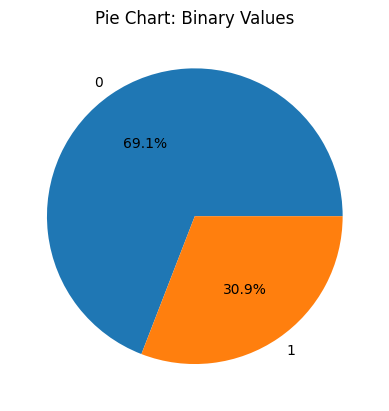

In [366]:
# Plot the pie chart

binary_values = y_train['Dependent_Variable'].value_counts()

plt.pie(binary_values.values, labels=binary_values.index, autopct='%1.1f%%')

# Set title
plt.title('Pie Chart: Binary Values')

# Show the plot
plt.show()


In [367]:
x_train.isnull().sum()

Unique_ID        0
C1               0
C2               0
C3               0
C4               0
C5               0
C6               0
C7               0
C8               0
N1               0
N2            4612
N3             365
N4            4606
N5            4606
N6             365
N7             427
N8               0
N9               0
N10            427
N10.1          427
N11            716
N12           4614
N14            608
N15            427
N16           4606
N17           4606
N18           4606
N19           4571
N20           4571
N21           4571
N22           4571
N23           2486
N24              0
N25          26779
N26          26779
N27          26779
N28          26779
N29          26779
N30          26779
N31          26779
N32          26830
N33              0
N34              0
N35            427
dtype: int64

In [368]:
df_train = pd.merge(x_train,y_train,how='left')
# df_train_with_id = df_train.copy()


# these columns had large number of missing values and some were them not required
droped_col_ls = ['Unique_ID','N25','N26','N27','N28','N29','N30','N31','N32','N33','Dependent_Variable']
df_train_y = df_train['Dependent_Variable']
df_train_x = df_train.drop(droped_col_ls,axis=1)

# Handling missing values

In [369]:
# handling missing values using Iterative Imputer

pipe = Pipeline([('imputer',IterativeImputer(max_iter=10, random_state=42)),
                 ('std_sclr',StandardScaler())])

impfit = pipe.fit(df_train_x)
np_train_x = pipe.transform(df_train_x)

In [370]:
pipe['imputer'].get_feature_names_out()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22',
       'N23', 'N24', 'N34', 'N35'], dtype=object)

# Feature Selection

In [371]:
np_train_x.shape

(33050, 34)

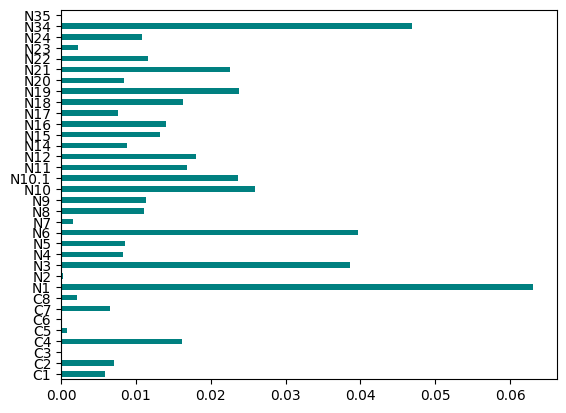

In [372]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(np_train_x,df_train_y)
feature_imp = pd.Series(importance,df_train_col)
feature_imp.plot(kind='barh',color='teal')
plt.show()

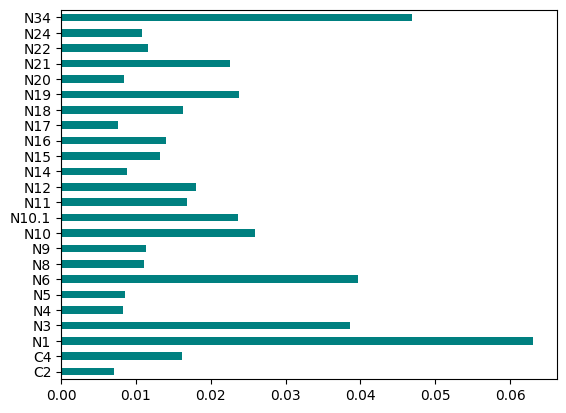

In [373]:
# droping columns with value less then 0.007
feature_imp = feature_imp[feature_imp > 0.007]
feature_imp.plot(kind='barh',color='teal')
plt.show()

In [374]:
# selected_columns

In [375]:
selected_columns = feature_imp.index
df_train_x = df_train[selected_columns]

np_train_std_x = pipe.fit(df_train_x)
np_train_std_x = pipe.transform(df_train_x)

In [376]:

# undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_init='auto', random_state=0), random_state=42)

# fit and apply the transform
np_train_std_x, df_train_y = undersample.fit_resample(np_train_std_x, df_train_y)

In [377]:
x_train_ , x_test_ , y_train_ , y_test_ = train_test_split(np_train_std_x,df_train_y,
                                                           train_size=0.8,
                                                           random_state=42,
                                                           stratify=df_train_y)
y_train_ = y_train_.values
y_test_ = y_test_.values

# model selection

baseline model
RidgeCV

In [380]:
clf_ridgeCCV = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=50).fit(x_train_, y_train_)

print(f'ridgeCCV train score {clf_ridgeCCV.score(x_train_, y_train_)}')
print(f'ridgeCCV val score {clf_ridgeCCV.score(x_test_, y_test_)}')
print('\n')

y_pred_rccv_test = clf_ridgeCCV.predict(x_test_)
ras_ridgeCCV = roc_auc_score(y_test_,y_pred_rccv_test )
print(f"ridgeCCV roc_auc_score for val data {ras_ridgeCCV}")

ridgeCCV train score 0.7890892178052584
ridgeCCV val score 0.7909827095644562


ridgeCCV roc_auc_score for val data 0.790982709564456


RandomForestClassifier


In [264]:
clf_randfor = RandomForestClassifier(n_estimators=2).fit(x_train_,y_train_)
print(f"clf_randfor train score {clf_randfor.score(x_train_,y_train_)}")
print(f"clf_randfor val score {clf_randfor.score(x_test_,y_test_)}")
print("\n")
y_pred_randf_test = clf_randfor.predict(x_test_)
ras_clf_randfor = roc_auc_score(y_test_,y_pred_randf_test )
print(f"clf_randfor roc_auc_score for val data {ras_clf_randfor}")

clf_randfor train score 0.844448527160267
clf_randfor val score 0.585843742346314


clf_randfor roc_auc_score for val data 0.5857938701285739


SVM

In [381]:
from sklearn.svm import SVC
clf_svc = SVC(probability=True,degree=10,C=0.85)
clf_svc.fit(x_train_,y_train_)

print(f"clf_svc train score {clf_svc.score(x_train_,y_train_)}")
print(f"clf_svc val score {clf_svc.score(x_test_,y_test_)}")
print("\n")
y_pred_svc_test = clf_svc.predict(x_test_)
ras_svc = roc_auc_score(y_test_,y_pred_svc_test )
print(f"ras_svc roc_auc_score for val data {ras_svc}")

clf_svc train score 0.8053404831605154
clf_svc val score 0.804005252790545


ras_svc roc_auc_score for val data 0.804005252790545


In [330]:
clf_log = LogisticRegressionCV(class_weight='balanced',random_state=42)
clf_log.fit(x_train_,y_train_)

print(f"clf_log train score {clf_log.score(x_train_,y_train_)}")
print(f"clf_log val score {clf_log.score(x_test_,y_test_)}")
print("\n")
y_pred_log_test = clf_log.predict(x_test_)
ras_log = roc_auc_score(y_test_,y_pred_log_test )
print(f"ras_log roc_auc_score for val data {ras_log}")

clf_log train score 0.6626860187396656
clf_log val score 0.6769532206710752


ras_log roc_auc_score for val data 0.676955180791809


Hyperparameter tuning for LogisticRegression

In [ ]:
'''
code commented out beacuse it takes longer time to run.
'''
# param_dist = {
#     'Cs': [1, 10, 100],
#     'cv': [3, 5, 10],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear'],
# }

# # Create a LogisticRegressionCV instance

# clf = LogisticRegressionCV(cv=5, random_state=42,
#                            class_weight='balanced',
#                            solver='liblinear',
#                            penalty='l2',
#                            cv=5,
#                            Cs=100)

# # Create RandomizedSearchCV instance
# random_search = RandomizedSearchCV(
#     clf,
#     param_distributions=param_dist,
#     n_iter=15,  # Number of iterations
#     scoring='accuracy',  # Use an appropriate scoring metric
#     cv=5,  # Number of cross-validation folds
#     random_state=42
# )

# # Perform the randomized grid search
# random_search.fit(x_train_,y_train_ )

# # Print best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

In [379]:
clf = LogisticRegressionCV(cv=5, random_state=42,
                           class_weight='balanced',
                           solver='liblinear',
                           penalty='l2',
                           Cs=10)

clf.fit(x_train_,y_train_)

y_test_pred_best = clf.predict(x_test_)
ras = roc_auc_score(y_test_,y_test_pred_best )
ras

0.794484569927774

Hyperparameter tuning for MLP

In [378]:
mlp = MLPClassifier(hidden_layer_sizes=(31, 15, 10,5),
                    alpha=0.081424224295953776,
                    early_stopping=True,
                    learning_rate='adaptive',
                    max_iter=100,
                    random_state=42,
                    warm_start=True,
                    )
mlp.fit(x_train_,y_train_)


print(f"mlp train score {mlp.score(x_train_,y_train_)}")
print(f"mlp val score {mlp.score(x_test_,y_test_)}")
print("\n")
y_pred_mlp_test = mlp.predict(x_test_)
ras_mlp = roc_auc_score(y_test_,y_pred_mlp_test )
print(f"ras_mlp roc_auc_score for val data {ras_mlp}")

mlp train score 0.8100188777324834
mlp val score 0.8046618516086671


ras_mlp roc_auc_score for val data 0.8046618516086671


In [145]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.neural_network import MLPClassifier
# from scipy.stats import randint, uniform

# base_estimator = MLPClassifier()

# # Define the hyperparameter grid
# param_dist = {
#     'hidden_layer_sizes': [(31, 15), (31,15,10)],
#     'max_iter': randint(100, 500),
#     'learning_rate': ['adaptive'],
#     'alpha': uniform(0.001, 0.1),
#     'early_stopping': [True],
#     'warm_start': [True],
#     'random_state': [42]
# }

# # Create the RandomizedSearchCV object
# random_search2 = RandomizedSearchCV(
#     estimator=base_estimator,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of random combinations to try
#     scoring='accuracy',
#     cv=5,  # Number of cross-validation folds
#     verbose=1,
#     n_jobs=-1,  # Use all available CPU cores
#     random_state=42
# )

# # Fit the RandomizedSearchCV object on your data
# # X_train, y_train = ...
# random_search2.fit(x_train_, y_train_)

# # Print the best hyperparameters and the corresponding score
# print("Best Hyperparameters:", random_search2.best_params_)
# print("Best Accuracy Score:", random_search2.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'alpha': 0.031424224295953776, 'early_stopping': True, 'hidden_layer_sizes': (31, 15, 10, 5), 'learning_rate': 'adaptive', 'max_iter': 352, 'random_state': 42, 'warm_start': True}
Best Accuracy Score: 0.7329046898638427


In [204]:
# best_estimator = random_search.best_estimator_

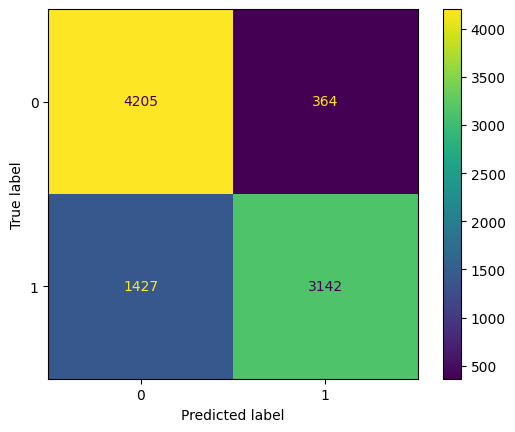

In [382]:
best_estimator = clf_svc
y_test_pred = best_estimator.predict(x_test_)
conf_mat = confusion_matrix(y_test_,y_test_pred)
con_dis = ConfusionMatrixDisplay(conf_mat)
con_dis.plot()

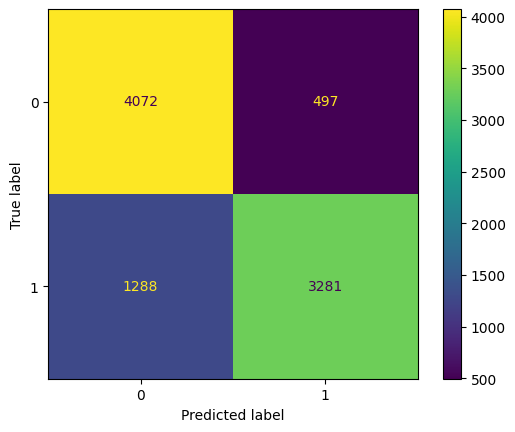

In [383]:
best_estimator = mlp
y_test_pred = best_estimator.predict(x_test_)
conf_mat = confusion_matrix(y_test_,y_test_pred)
con_dis = ConfusionMatrixDisplay(conf_mat)
con_dis.plot()

In [281]:

y_test_pred_best = best_estimator.predict(x_test_)
ras = roc_auc_score(y_test_,y_test_pred_best )
ras

0.6887206008462178

# Making Prediction using MLP

In [385]:
df_test  = pd.read_csv("/content/DS Test/Test/X_test.csv")

df_test[['C6','C8']] =  df_test[['C6','C8']].replace({True: 1, False: 0})
# droped_col_ls = ['N25','N26','N27','N28','N29','N30','N31','N32','N33']
df_unique_id = df_test['Unique_ID']
# df_x_test = df_x_test.drop([droped_col_ls],axis=1)

selected_columns = feature_imp.index
df_test_x = df_test[selected_columns]

np_test_std_x = pipe.fit(df_test_x)
np_test_std_x = pipe.transform(df_test_x)



In [386]:
y_pred_test = best_estimator.predict_proba(np_test_std_x)[:,1]


In [387]:
out_df = pd.DataFrame({'Unique_ID':df_unique_id,'Class_1_Probability':y_pred_test})

In [388]:
csv_filename = 'final_prediction.csv'
out_df.to_csv(csv_filename, index=False)